In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os

In [2]:
# Master Path

path = r'/Users/jagpreetbatth/Desktop/Career Foundry/Python/11-2021 Instacart Basket Analysis'

In [3]:
# Verify Path

path

'/Users/jagpreetbatth/Desktop/Career Foundry/Python/11-2021 Instacart Basket Analysis'

In [4]:
# Import latest version of ords/prods/cust dataset

ords_prods_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# Check shape

ords_prods_cust.shape

(30563166, 33)

In [6]:
# Verify Correct Import 

ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Surname,Gender,STATE,Age,date_joined,dependents,marital_status,income
0,2398795,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1.0,2.0,3.0,7.0,15.0,10258.0,2.0,0.0,Pistachios,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2398795,1.0,2.0,3.0,7.0,15.0,12427.0,3.0,1.0,Original Beef Jerky,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2398795,1.0,2.0,3.0,7.0,15.0,13176.0,4.0,0.0,Bag of Organic Bananas,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2398795,1.0,2.0,3.0,7.0,15.0,26088.0,5.0,1.0,Aged White Cheddar Popcorn,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# Copy data to clipboard to paste into EXCEL sheet using crosstab

crosstab = pd.crosstab(ords_prods_cust['days_since_prior_order'], ords_prods_cust['order_number'], dropna = False)

In [8]:
crosstab.to_clipboard()

In [9]:
# Remove any personally identifiable information (PII) - (FIRST AND LAST NAME COLUMNS)

ords_prods_cust.drop('First Name', inplace=True, axis=1)
ords_prods_cust.drop('Surname', inplace=True, axis=1)

In [10]:
# Verify Removal of PII Columns

for col in ords_prods_cust.columns: 
    print(col)

order_id
user_id
order_number
orders_day_of_week
order_hour_of_day
days_since_prior_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
_merge
price_range_loc
busiest_day
busiest_days
busiest_period_of_day
max_order
loyalty_flag
average_purchase_price
spending_flag
median_days_since_prior_order
order_frequency_flag
Gender
STATE
Age
date_joined
dependents
marital_status
income


In [11]:
# Remove redundant columns - 'busiest_days'

ords_prods_cust.drop('busiest_days', inplace=True, axis=1)

In [12]:
# Verify removal of redundant Columns

for col in ords_prods_cust.columns: 
    print(col)

order_id
user_id
order_number
orders_day_of_week
order_hour_of_day
days_since_prior_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
_merge
price_range_loc
busiest_day
busiest_period_of_day
max_order
loyalty_flag
average_purchase_price
spending_flag
median_days_since_prior_order
order_frequency_flag
Gender
STATE
Age
date_joined
dependents
marital_status
income


In [13]:
# Check shape

ords_prods_cust.shape

(30563166, 30)

In [14]:
# Check output

ords_prods_cust[['max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag']].head(500)

,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,11.0,Regular customer,Low spender,Regular customer
1,11.0,Regular customer,Low spender,Regular customer
2,11.0,Regular customer,Low spender,Regular customer
3,11.0,Regular customer,Low spender,Regular customer
4,11.0,Regular customer,Low spender,Regular customer
...,...,...,...,...
495,21.0,Regular customer,Low spender,Frequent customer
496,21.0,Regular customer,Low spender,Frequent customer
497,21.0,Regular customer,Low spender,Frequent customer
498,21.0,Regular customer,Low spender,Frequent customer


In [15]:
# Create 'Region' column based on 'STATE' column to study customers based on geographical area using for-loop fucntion

result = []

for value in ords_prods_cust['STATE']:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    result.append('Northeast')
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Missouri' or value == 'Minnesota' or value == 'Iowa':
    result.append('Midwest')
  elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
    result.append('West')  
  else:
    result.append('South')

In [16]:
# Verify Regional Breakdown

result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',


In [17]:
# Create new column for REGIONS

ords_prods_cust['REGION'] = result

In [18]:
# Verify Region column creation based on STATE

ords_prods_cust[['STATE', 'REGION']].head(500)

,STATE,REGION
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South
...,...,...
495,Connecticut,Northeast
496,Connecticut,Northeast
497,Connecticut,Northeast
498,Connecticut,Northeast


In [19]:
# Check shape

ords_prods_cust.shape

(30563166, 31)

In [20]:
# Investigate spending habits in U.S. regionally by using crosstab

crosstab1 = pd.crosstab(ords_prods_cust['spending_flag'], ords_prods_cust['REGION'], dropna = False)

In [21]:
# Check results

crosstab1

REGION,Midwest,Northeast,South,West
spending_flag,,,,
High spender,149908,103985,199342,151586
Low spender,7012421,5294008,9978614,7673293


#### Note the increased number of 'Low Spenders' among all regions of the U.S. when compared to 'High Spenders'

In [22]:
# Copy to Clipboard for data use in Excel

crosstab1.to_clipboard()

In [23]:
# Seperate high revenue generating customers from low revenue generaters using exclusion flags

ords_prods_cust.loc[ords_prods_cust['order_number'] >= 5, 'activity flag'] = 'High activity'
ords_prods_cust.loc[ords_prods_cust['order_number'] < 5, 'activity flag'] = 'Low activity'

In [24]:
# Verify flag creation

ords_prods_cust[['order_number', 'user_id', 'activity flag']].head(60)

,order_number,user_id,activity flag
0,2.0,1.0,Low activity
1,2.0,1.0,Low activity
2,2.0,1.0,Low activity
3,2.0,1.0,Low activity
4,2.0,1.0,Low activity
5,2.0,1.0,Low activity
6,3.0,1.0,Low activity
7,3.0,1.0,Low activity
8,3.0,1.0,Low activity
9,3.0,1.0,Low activity


In [25]:
# Exclude 'Low activity' / revenue generating customers usind DROP function

ords_prods_cust.drop(ords_prods_cust.index[ords_prods_cust['activity flag'] == 'Low activity'], inplace = True)

In [26]:
# Verify drop

ords_prods_cust.head(60)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,STATE,Age,date_joined,dependents,marital_status,income,REGION,activity flag
16,431534,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
17,431534,1.0,5.0,4.0,15.0,28.0,12427.0,2.0,1.0,Original Beef Jerky,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
18,431534,1.0,5.0,4.0,15.0,28.0,10258.0,3.0,1.0,Pistachios,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
19,431534,1.0,5.0,4.0,15.0,28.0,25133.0,4.0,1.0,Organic String Cheese,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
20,431534,1.0,5.0,4.0,15.0,28.0,10326.0,5.0,0.0,Organic Fuji Apples,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
21,431534,1.0,5.0,4.0,15.0,28.0,17122.0,6.0,0.0,Honeycrisp Apples,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
22,431534,1.0,5.0,4.0,15.0,28.0,41787.0,7.0,0.0,Bartlett Pears,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
23,431534,1.0,5.0,4.0,15.0,28.0,13176.0,8.0,1.0,Bag of Organic Bananas,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
24,3367565,1.0,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
25,3367565,1.0,6.0,2.0,7.0,19.0,12427.0,2.0,1.0,Original Beef Jerky,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [27]:
# Check Shape

ords_prods_cust.shape

(24619687, 32)

In [28]:
# Customer profiling based on age, income, dependents,marital status and goods purchased

ords_prods_cust.loc[(ords_prods_cust['Age'] > 40) & (ords_prods_cust['marital_status'] != 'single') & (ords_prods_cust['dependents'] == 0), 'Customer Profile'] = 'Old single adult'
ords_prods_cust.loc[(ords_prods_cust['Age'] <= 40) & (ords_prods_cust['marital_status'] != 'single') & (ords_prods_cust['dependents'] == 0), 'Customer Profile'] = 'Young single adult'
ords_prods_cust.loc[(ords_prods_cust['Age'] <= 40) & (ords_prods_cust['marital_status'] != 'single') & (ords_prods_cust['dependents'] >= 1), 'Customer Profile'] = 'Young single parent'
ords_prods_cust.loc[(ords_prods_cust['Age'] > 40) & (ords_prods_cust['marital_status'] != 'single') & (ords_prods_cust['dependents'] >= 1), 'Customer Profile'] = 'Old single parent'
ords_prods_cust.loc[(ords_prods_cust['Age'] <= 40) & (ords_prods_cust['marital_status'] == 'married') & (ords_prods_cust['dependents'] >= 1), 'Customer Profile'] = 'Young married parent'
ords_prods_cust.loc[(ords_prods_cust['Age'] > 40) & (ords_prods_cust['marital_status'] == 'married') & (ords_prods_cust['dependents'] >= 1), 'Customer Profile'] = 'Old married parent'
ords_prods_cust.loc[(ords_prods_cust['Age'] <= 40) & (ords_prods_cust['marital_status'] == 'married') & (ords_prods_cust['dependents'] == 0), 'Customer Profile'] = 'Young married adult'
ords_prods_cust.loc[(ords_prods_cust['Age'] > 40) & (ords_prods_cust['marital_status'] == 'married') & (ords_prods_cust['dependents'] == 0), 'Customer Profile'] = 'Old married adult'

In [29]:
# Veirfy creation of customer profiles

ords_prods_cust[['Age', 'marital_status', 'dependents', 'Customer Profile']].head(500)

,Age,marital_status,dependents,Customer Profile
16,31,married,3,Young married parent
17,31,married,3,Young married parent
18,31,married,3,Young married parent
19,31,married,3,Young married parent
20,31,married,3,Young married parent
...,...,...,...,...
954,51,married,2,Old married parent
955,51,married,2,Old married parent
956,51,married,2,Old married parent
957,51,married,2,Old married parent


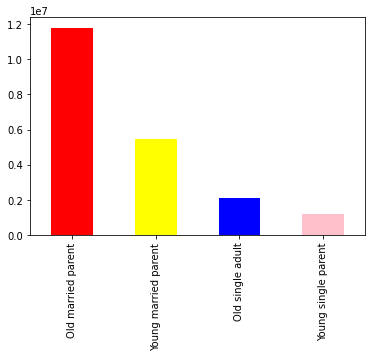

In [30]:
# Visualization of Customer Profiles based on count

bar1 = ords_prods_cust['Customer Profile'].value_counts().plot.bar(color =['red', 'yellow', 'blue', 'pink', 'green'])

### Note that the customer base has an increased amount of 'Old married parents'. Direct marketing to focus on customers that fit this profile to increase revenue. 

In [31]:
# Export Bar Chart

bar1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_customer_profile.png'))

In [32]:
# Check Shape

ords_prods_cust.shape

(24619687, 33)

In [33]:
# Determine purchase habits based on loyalty flag

xtab_avgorder_pricerange = pd.crosstab(ords_prods_cust['loyalty_flag'], ords_prods_cust['price_range_loc'], dropna = False)

In [34]:
# View Results

xtab_avgorder_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,115321,3090256,6679352
New customer,22415,514956,1109321
Regular customer,170951,4021533,8690772


In [35]:
# Copy to Clipboard for data use in Excel

xtab_avgorder_pricerange.to_clipboard()

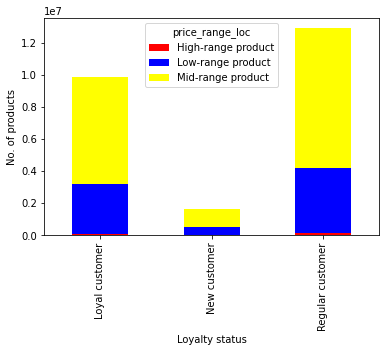

In [36]:
# Create Visualization of Loyalty Purchase Habits 

# stacked bar chart based on loyalty_flag and price_range_loc

stacked_order_price = xtab_avgorder_pricerange.plot.bar(color =['red', 'blue', 'yellow'], xlabel= 'Loyalty status', ylabel= 'No. of products', stacked = True)

In [37]:
# Export Bar Chart

stacked_order_price.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_purchases_bar.png'))

In [38]:
# Marital status and ordering Habits

marital_loyalty = pd.crosstab(ords_prods_cust['marital_status'], ords_prods_cust['loyalty_flag'], dropna = False)

In [39]:
# Check Results

marital_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
marital_status,,,
divorced/widowed,853019,145494,1108218
living with parents and siblings,473346,79971,627883
married,6937745,1216540,9127713
single,1648195,286689,2114874


In [40]:
# Copy to Clipboard for data use in Excel

marital_loyalty.to_clipboard()

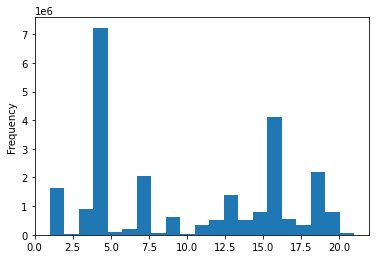

In [47]:
# Visualization based on department prevalence (21 departments total)

hist1 = ords_prods_cust['department_id'].plot.hist(bins = 21)

#### Note the histogram above indicates that deparments 4 and 16 have a higher prevalance, which are produce and diary/egg.

In [48]:
# Legend for departments and department IDs for above visualization reference

df_dep = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'departments.csv'), index_col = False)

In [49]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [50]:
# Transpose the table

df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [51]:
# Export Histogram 

hist1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist1_department_frequency.png'))

In [52]:
# Descriptive Statisical profile on customer profiles to find out expenditure

ords_prods_cust.groupby('Customer Profile').agg({'prices' : ['mean', 'min', 'max']})

prices              
                           mean  min      max
Customer Profile                             
Old married parent    11.619318  1.0  99999.0
Old single adult      11.357794  1.0  99999.0
Young married parent  12.294695  1.0  99999.0
Young single parent   10.699303  1.0  99999.0

#### The statistical analysis shows consistency with the average prices hovering around 12 among the various customer profiles with only young single parents buying lower priced items.

In [53]:
# Descriptive Statisical profile on customer profiles to find out usage frequency

ords_prods_cust.groupby('Customer Profile').agg({'median_days_since_prior_order' : ['mean', 'min', 'max']})

median_days_since_prior_order           
                                              mean  min   max
Customer Profile                                             
Old married parent                        9.017244  0.0  30.0
Old single adult                          8.926222  0.0  30.0
Young married parent                      8.990556  0.0  30.0
Young single parent                       8.917661  0.0  30.0

#### The statisical analysis shows consistency with the average days in between orders hovering around 9 days among the various customer profiles.

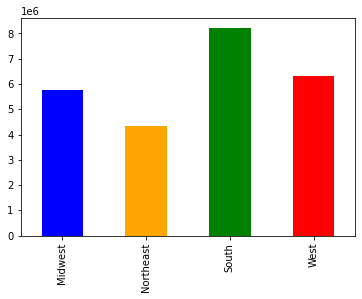

In [54]:
# Customer profile relationship with Regions (customer distribution depending on Region of U.S.)

region_bar = ords_prods_cust['REGION'].value_counts().sort_index().plot.bar(color =['blue', 'orange', 'green','red'])

#### The bar chart above indicates that the highest InstaCart customers are located in the south.

In [55]:
# Export Bar Chart

region_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_bar.png'))

In [56]:
# Customer Region relationship with departments (Department distribution depending on Region of U.S.)

department_region = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['REGION'], dropna = False)

In [57]:
import seaborn as sns

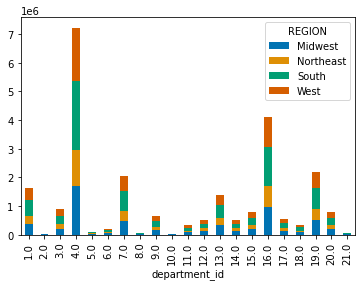

In [58]:
# Visualization of Customer ordering habits based on region

bar_department_region = department_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('colorblind', 4))

#### The stacked bar chart shown above reiterates the most sales are in the produce and egg/dairy departments as well as increased purchasing of products within the departments among the south and western regions of the U.S.

In [59]:
# Export Stacked Bar chart

bar_department_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_department_region.png'))

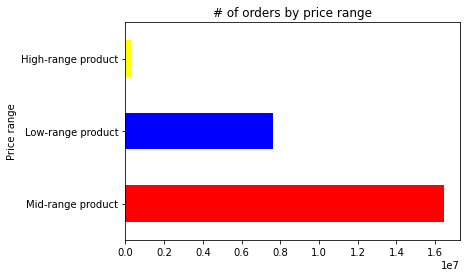

In [60]:
# bar chart based on orders by department_id

price_range_bar = ords_prods_cust['price_range_loc'].value_counts().plot.barh(color =['red', 'blue', 'yellow'], xlabel= 'Price range', ylabel= '# of orders', title = '# of orders by price range')

In [66]:
# Export Bar chart

price_range_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_price_range.png'))

In [67]:
# Exploring correlation between Customer Profiles and deparment ID

crosstab_gen_dept = pd.crosstab(ords_prods_cust['Customer Profile'], ords_prods_cust['department_id'], dropna = False)

In [68]:
crosstab_gen_dept

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Customer Profile,,,,,,,,,,,,,,,,,,,,,
Old married parent,781084,12859,423562,3456721,49455,93807,983160,34453,303807,13384,...,253495,665910,251610,378208,1967535,261350,161553,1045032,373439,27807
Old single adult,141623,2267,75587,619577,8936,16965,175452,6262,54174,2213,...,44554,118637,44414,65423,352593,45168,27775,186821,68073,4509
Young married parent,361505,5912,195626,1613783,24274,44396,446908,15218,141898,6242,...,116938,306978,116951,176349,922821,120044,74486,492732,174035,12657
Young single parent,79512,1460,42543,343702,6284,9659,94324,4190,30606,1347,...,25251,67169,26224,37784,199894,25796,15595,103918,37543,2971


<AxesSubplot:>

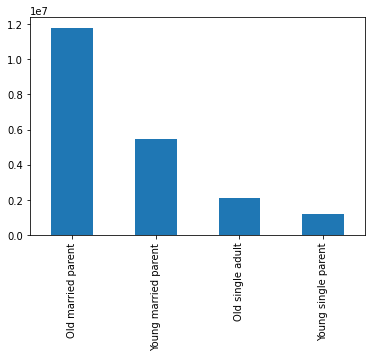

In [76]:
# A breakdown of our customers by Profile

ords_prods_cust['Customer Profile'].value_counts().plot.bar()

# Customer profile insights by spending type

In [75]:
ords_prods_cust['spending_flag'].value_counts(dropna = False)

Low spender     24135667
High spender      484016
NaN                    4
Name: spending_flag, dtype: int64

In [77]:
# Xrosstab of customer_profile & spending_flag variables

cust_profile_spender = pd.crosstab(ords_prods_cust['Customer Profile'], ords_prods_cust['spending_flag'], dropna = False)

In [78]:
# Check Results

cust_profile_spender

spending_flag,High spender,Low spender
Customer Profile,,
Old married parent,235535,11558921
Old single adult,40960,2065771
Young married parent,107881,5379657
Young single parent,22850,1158350


In [79]:
# Copy to Clipboard for data use in Excel

cust_profile_spender.to_clipboard()

# Customer profile insights by region

In [83]:
# Crosstab of customer_profile & region variables

profile_regional = pd.crosstab(ords_prods_cust['Customer Profile'], ords_prods_cust['REGION'], dropna = False)

In [84]:
# Check Results

profile_regional

REGION,Midwest,Northeast,South,West
Customer Profile,,,,
Old married parent,2767168,2107008,3886988,3033296
Old single adult,489180,383517,699204,534830
Young married parent,1265208,963715,1852356,1406259
Young single parent,278253,206613,402536,293798


In [85]:
# Copy to Clipboard for data use in Excel

profile_regional.to_clipboard()

In [42]:
# Customer profile by usage

ords_prods_cust['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        18223428
Regular customer          4882332
Non-frequent customer     1513927
Name: order_frequency_flag, dtype: int64

In [43]:
# High profile customers who generate highest revenue

ords_prods_cust['activity flag'].value_counts(dropna = False)

High activity    24619687
Name: activity flag, dtype: int64

In [44]:
# Check final Shape

ords_prods_cust.shape

(24619687, 33)

In [45]:
# Export data in pickle format

ords_prods_cust.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ords_prods_cust.pkl'))